# Classification of Consumer Complaints

**What steps did you take to preprocess the data?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

from collections import Counter
from textblob import TextBlob

In [2]:
complaints = pd.read_csv('data/complaints.csv')

In [3]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [4]:
# changing column names
complaints.columns = ['complaint', 'category']
complaints

,complaint,category
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


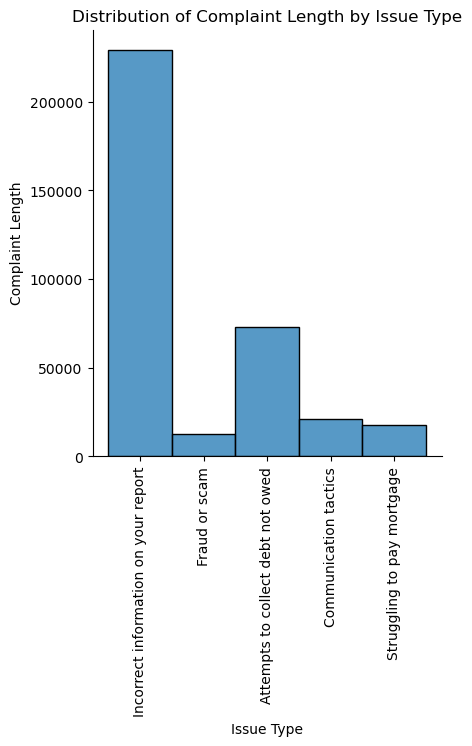

In [5]:
# Calculate the length of each complaint
complaints['Complaint Length'] = complaints['complaint'].str.len()

# Group the data by issue type and calculate the distribution statistics
distribution = complaints.groupby('category')['Complaint Length'].describe()

# Plot the distribution using Seaborn
sns.displot(data=complaints, x='category', binwidth=6)
plt.xlabel('Issue Type')
plt.ylabel('Complaint Length')
plt.title('Distribution of Complaint Length by Issue Type')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

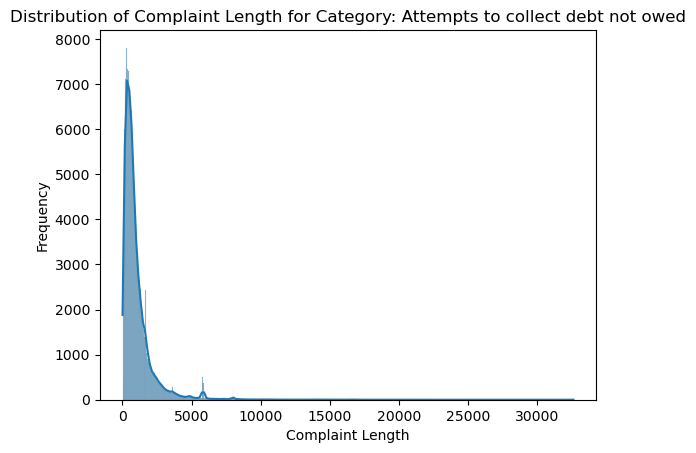

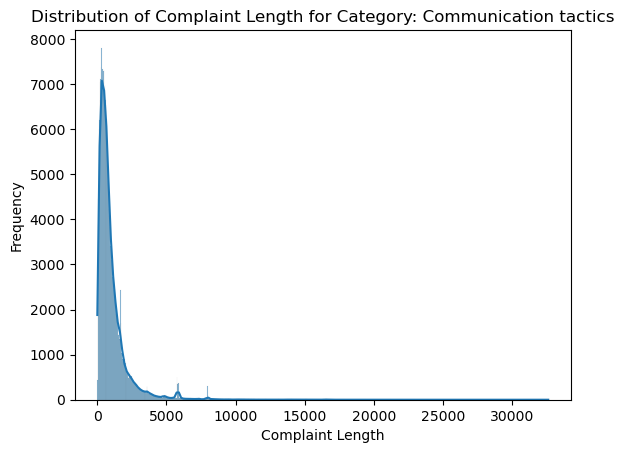

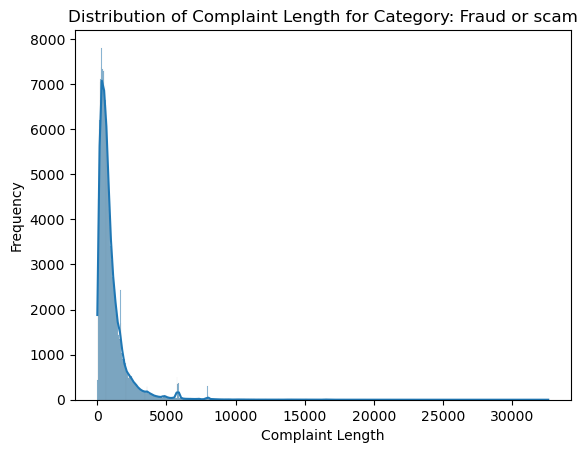

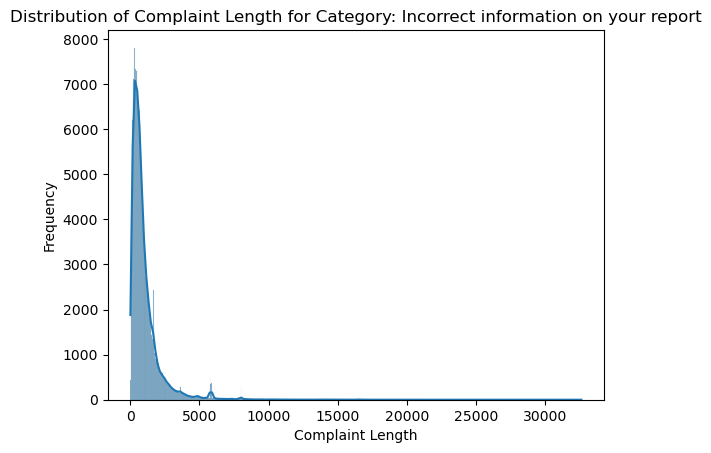

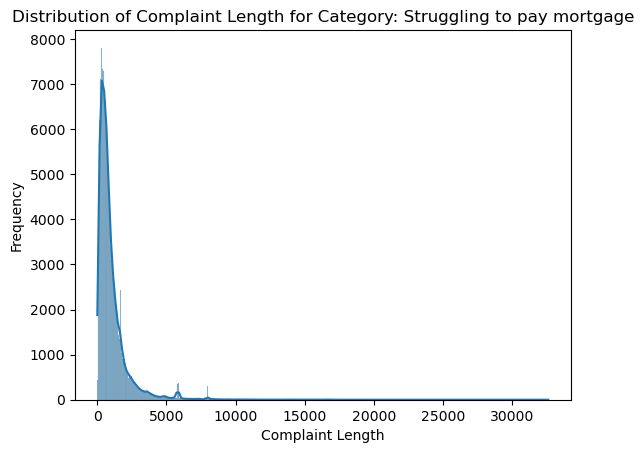

In [6]:
# Assuming your DataFrame is named 'complaints' and has columns 'complaint' and 'category'
# Calculate the length of each complaint
complaints['Complaint Length'] = complaints['complaint'].str.len()

# Plot distribution for each category
for category, data in complaints.groupby('category'):
    plt.figure()  # Create a new figure for each category
    sns.histplot(data=complaints, x='Complaint Length', kde=True)
    plt.title(f'Distribution of Complaint Length for Category: {category}')
    plt.xlabel('Complaint Length')
    plt.ylabel('Frequency')

plt.show()

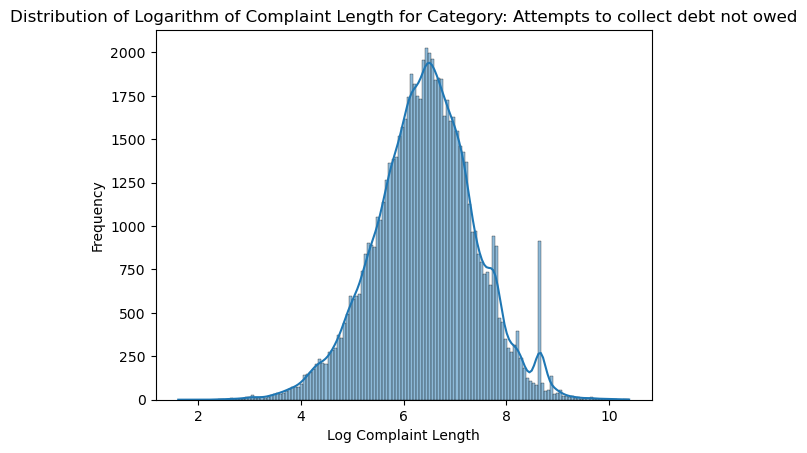

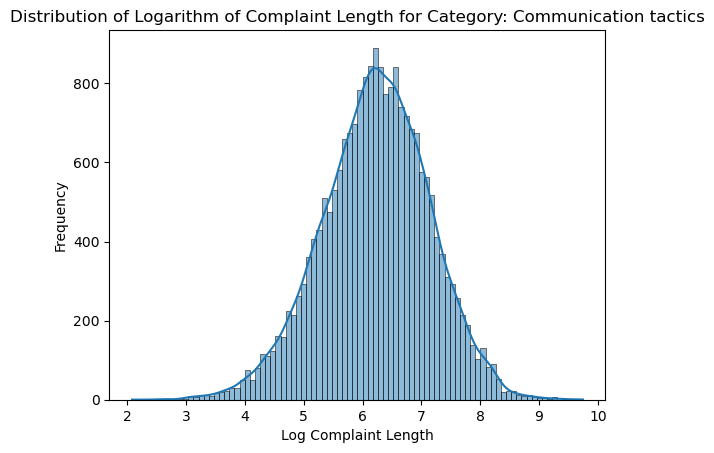

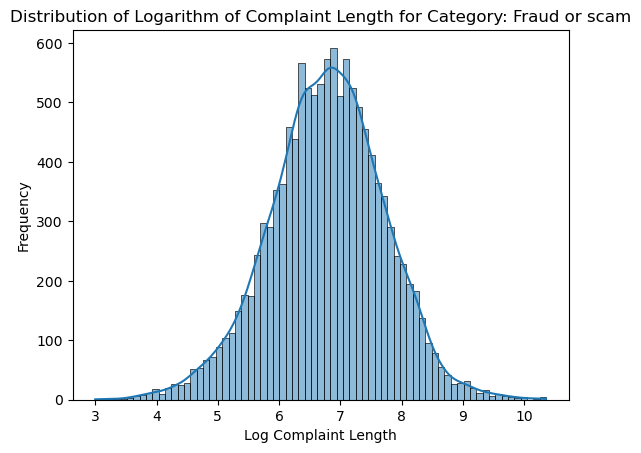

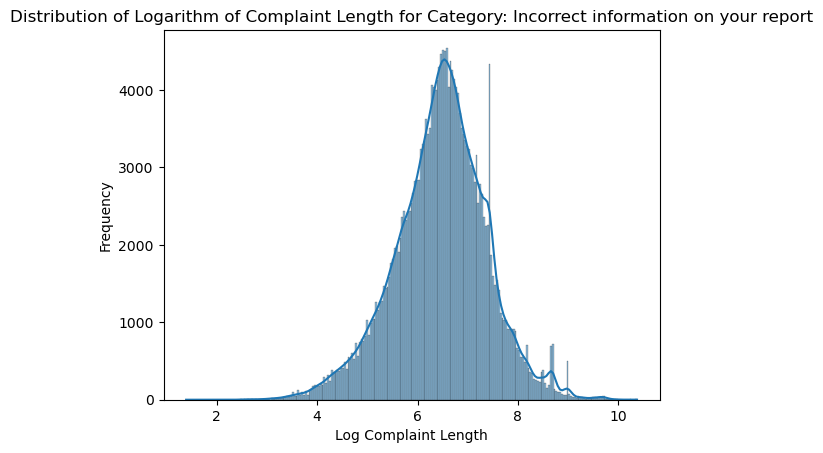

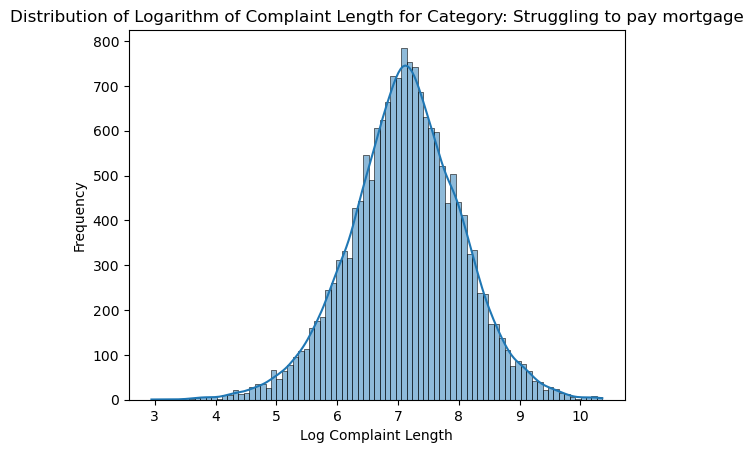

In [7]:
# Assuming your DataFrame is named 'complaints' and has columns 'complaint' and 'category'
# Calculate the length of each complaint
complaints['Complaint Length'] = complaints['complaint'].str.len()

# Apply logarithmic transformation to the complaint lengths
complaints['Log Complaint Length'] = np.log(complaints['Complaint Length'])

# Plot distribution for each category
for category, data in complaints.groupby('category'):
    plt.figure()  # Create a new figure for each category
    sns.histplot(data=data, x='Log Complaint Length', kde=True)
    plt.title(f'Distribution of Logarithm of Complaint Length for Category: {category}')
    plt.xlabel('Log Complaint Length')
    plt.ylabel('Frequency')
  #  plt.savefig(f'distribution_{category}.png', dpi=300)  # Save the plot as PNG

#plt.close('all')

plt.show()

In [13]:
complaints['Word Count'] = complaints['complaint'].str.split().apply(len)
complaints['Character Count'] = complaints['complaint'].str.len()
complaints['Avg Word Length'] = complaints['complaint'].str.split().apply(lambda x: sum(len(word) for word in x) / len(x))

In [20]:
# Drop rows with 'XXXX XXXX'
# Drop rows with specific patterns
complaints = complaints[~complaints['complaint'].str.contains(r'XXXX XXXX|XXXX|XXXX/XXX/XX|XX/XX/XXXX', regex=True)]

In [21]:
# Drop rows with parentheses
complaints = complaints[~complaints['complaint'].str.contains('[()]', regex=False)]

In [22]:
complaints

,complaint,category,Complaint Length,Log Complaint Length,Word Count,Character Count,Avg Word Length,tokens
2,I have a particular account that is stating th...,Incorrect information on your report,294,5.683580,55,294,4.327273,"[i, have, a, particular, account, that, is, st..."
7,This account was opened over 10 years ago. Thi...,Incorrect information on your report,473,6.159095,88,473,4.386364,"[this, account, was, opened, over, 10, years, ..."
11,The last time I ever made a payment was XX/XX/...,Attempts to collect debt not owed,335,5.814131,61,335,4.508197,"[the, last, time, i, ever, made, a, payment, w..."
15,I went over my credit and noticed there are a ...,Incorrect information on your report,83,4.418841,17,83,3.941176,"[i, went, over, my, credit, and, noticed, ther..."
19,This company is reporting information without ...,Attempts to collect debt not owed,285,5.652489,48,285,4.958333,"[this, company, is, reporting, information, wi..."
...,...,...,...,...,...,...,...,...
353419,I have asked this compnay to not contact me at...,Communication tactics,166,5.111988,33,166,4.060606,"[i, have, asked, this, compnay, to, not, conta..."
353420,i keep getting calls from premier portfolio gr...,Communication tactics,112,4.718499,21,112,4.380952,"[i, keep, getting, calls, from, premier, portf..."
353422,"Harassing me at work, calling and harassing fe...",Communication tactics,189,5.241747,32,189,4.937500,"[harassing, me, at, work,, calling, and, haras..."
353427,Collections account I have no knowledge of,Attempts to collect debt not owed,42,3.737670,7,42,5.142857,"[collections, account, i, have, no, knowledge,..."


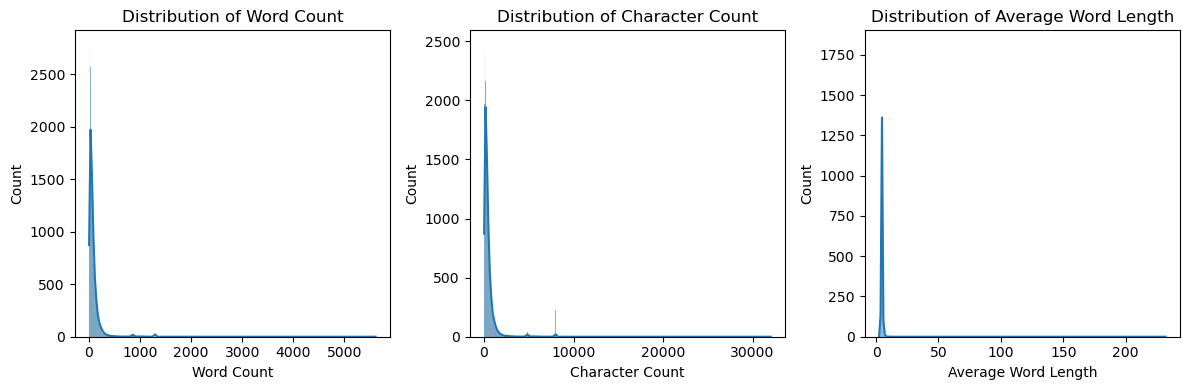

In [19]:
# Plot distributions
plt.figure(figsize=(12, 4))

# Word Count distribution
plt.subplot(1, 3, 1)
sns.histplot(data=complaints, x='Word Count', kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')

# Character Count distribution
plt.subplot(1, 3, 2)
sns.histplot(data=complaints, x='Character Count', kde=True)
plt.title('Distribution of Character Count')
plt.xlabel('Character Count')

# Average Word Length distribution
plt.subplot(1, 3, 3)
sns.histplot(data=complaints, x='Avg Word Length', kde=True)
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')

#plt.savefig(f'distribution_{category}.png', dpi=300)  # Save the plot as PNG

#plt.close('all')

plt.tight_layout()  # Optional: Adjust the spacing between subplots
plt.show()